In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import pandas as pd

In [6]:

from dbspace.signal.spot_check import spot_check


In [8]:
def stim_plot(ts,Fs):
    plt.figure()
    plt.subplot(211)
    plt.plot(np.linspace(0,ts.shape[0]/Fs,ts.shape[0]),ts)
    
    plt.subplot(212)
    F,Pxx = sig.welch(ts,fs=Fs,nfft=2**15,nperseg=2**10,noverlap=2**10-5)
    plt.plot(F,(Pxx),linewidth=5,label='Sampled')
    #plt.xlim((0,500))
    
    return F

def raw(timeseries):
    stim_plot(timeseries[:,1],Fs=1e6)
    
def decimated(timeseries, factor=100):
    if factor == 1:
        ds_stim = timeseries[0:70000,1]    
    else:
        ds_stim = sig.decimate(timeseries[0:70000,1],q=factor)
        
    print(stim_plot(ds_stim,Fs=1e6/factor))


In [9]:
# Relevant Files
ipg_infile = '/home/vscode/data/stim_waveform/ssipgwave_vreg_Ra1p1kOhm_1usdt.txt'
sample_voltage_sweep = '/home/virati/MDD_Data/Benchtop/VRT_Impedance_RB/Session_2018_04_24_Tuesday/demo_2018_04_24_16_53_36__MR_0.txt'

In [10]:
synthetic_waveform = np.array(pd.read_csv(ipg_infile,sep=',',header=None))
decimated(synthetic_waveform, factor=5)

FileNotFoundError: [Errno 2] No such file or directory: '../assets/data/stim_waveform/ssipgwave_vreg_Ra1p1kOhm_1usdt.txt'

/home/virati/Dropbox/projects/Research/MDD-DBS/Ephys/DBSpace/src/DBSpace/utils/spot_check.py:256: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  #pdb.set_trace()
/home/virati/Dropbox/projects/Research/MDD-DBS/Ephys/DBSpace/src/DBSpace/utils/spot_check.py:256: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  #pdb.set_trace()


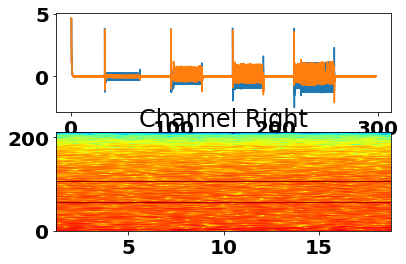

In [ ]:
_ = spot_check.spot_check(sample_voltage_sweep,tlims=(10,30),plot_sg=True)